![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


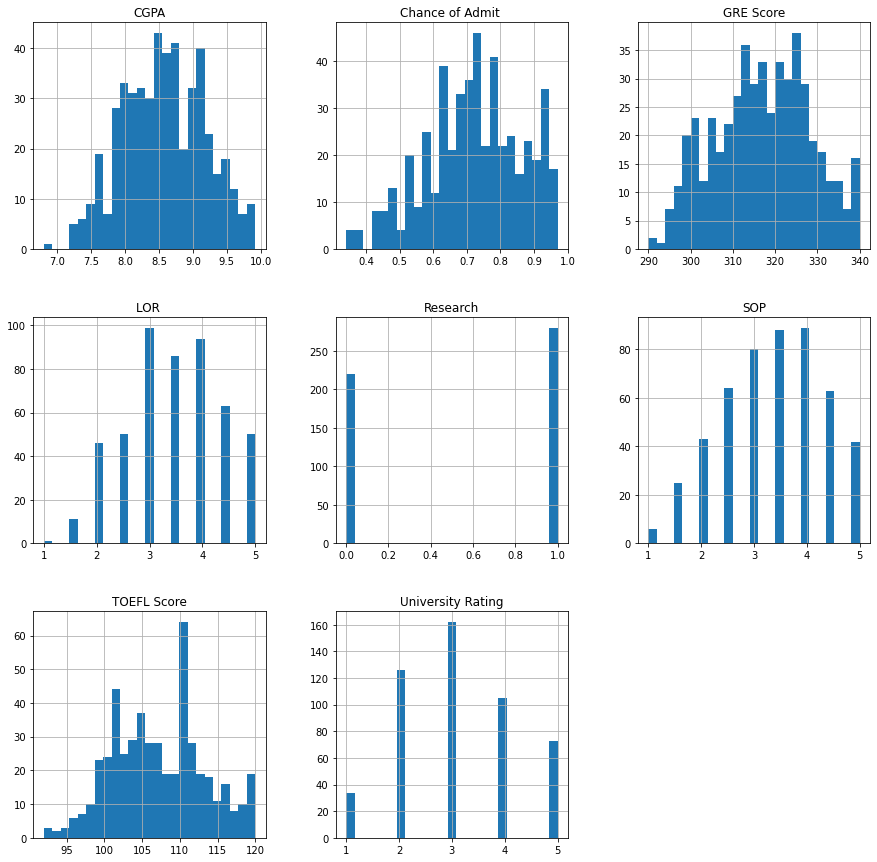

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
#!pip install livelossplot

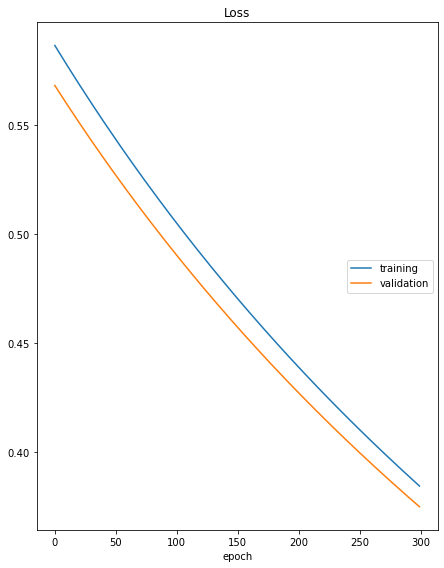

Loss
	training         	 (min:    0.385, max:    0.586, cur:    0.385)
	validation       	 (min:    0.375, max:    0.568, cur:    0.375)
11/11 [==============================] - 0s 25ms/step - loss: 0.3846 - val_loss: 0.3751
MAE: 0.5966027174293994
MSE: 0.3678003156892569


In [9]:
# Celda 1

np.random.seed(seed=42)

# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler
from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras.callbacks import ModelCheckpoint

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

#Definición de dimensiones de salida, varaibles de interés
output_var = Y_train.shape[0]
print(output_var, ' output variables')

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

fBestModel = './1_model_1_capa.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

model.load_weights(fBestModel)

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

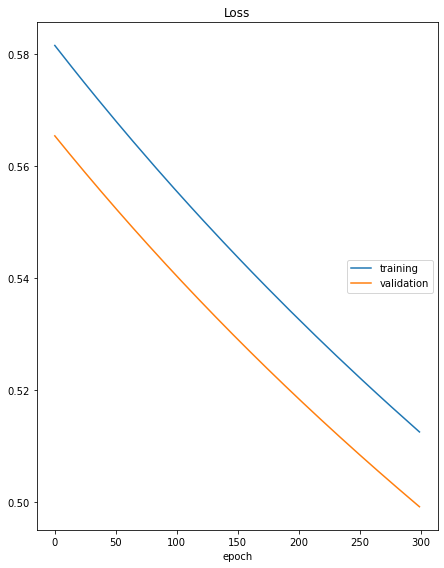

Loss
	training         	 (min:    0.513, max:    0.581, cur:    0.513)
	validation       	 (min:    0.499, max:    0.565, cur:    0.499)
11/11 [==============================] - 0s 32ms/step - loss: 0.5126 - val_loss: 0.4992
MAE: 0.6605560527766744
MSE: 0.5254830147958722


In [10]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adagrad', loss='mean_squared_error')

fBestModel = './1_model_1_adagrad.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

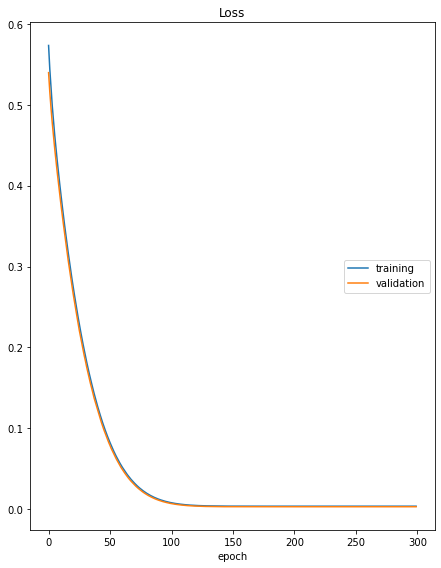

Loss
	training         	 (min:    0.004, max:    0.573, cur:    0.004)
	validation       	 (min:    0.003, max:    0.540, cur:    0.003)
11/11 [==============================] - 0s 38ms/step - loss: 0.0038 - val_loss: 0.0031
MAE: 0.04090154849688213
MSE: 0.0031254158378999962


In [11]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error')

fBestModel = './1_model_1_adam.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

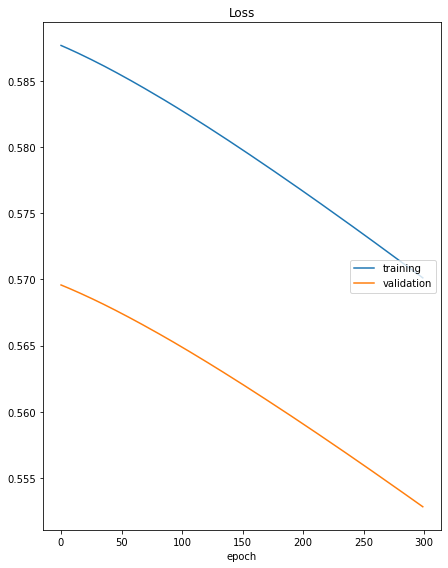

Loss
	training         	 (min:    0.570, max:    0.588, cur:    0.570)
	validation       	 (min:    0.553, max:    0.570, cur:    0.553)
11/11 [==============================] - 0s 27ms/step - loss: 0.5701 - val_loss: 0.5528
MAE: 0.7072726698524008
MSE: 0.5442843801429332


In [12]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adadelta', loss='mean_squared_error')

fBestModel = './1_model_1_adadelta.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

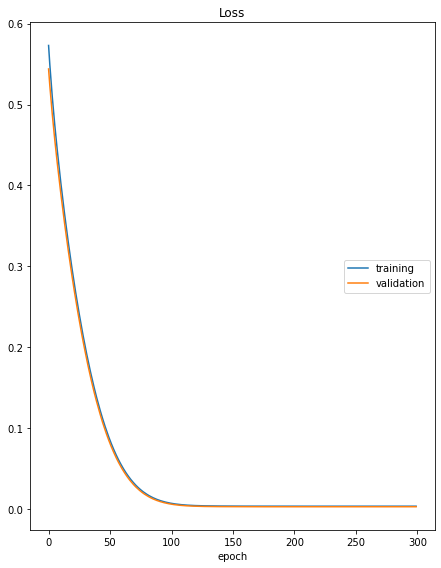

Loss
	training         	 (min:    0.004, max:    0.573, cur:    0.004)
	validation       	 (min:    0.003, max:    0.544, cur:    0.003)
11/11 [==============================] - 0s 19ms/step - loss: 0.0038 - val_loss: 0.0031
MAE: 0.04090955788294475
MSE: 0.0031228052033759725


In [13]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adamax', loss='mean_squared_error')

fBestModel = './1_model_1_adamax.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MAE:', MAE_1)

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

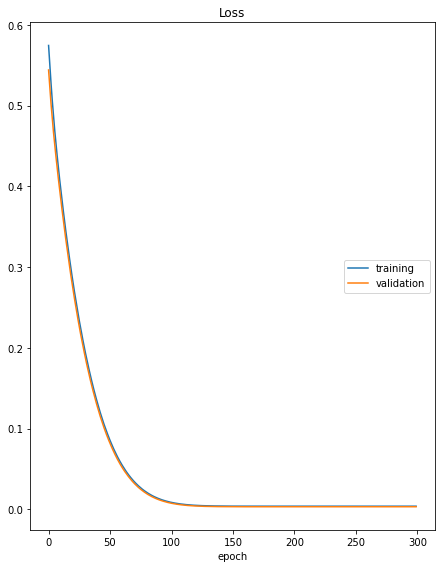

Loss
	training         	 (min:    0.004, max:    0.575, cur:    0.004)
	validation       	 (min:    0.003, max:    0.544, cur:    0.003)
11/11 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 0.0031
MAE: 0.040895739340782174
MSE: 0.003118071948821056


In [21]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='nadam', loss='mean_squared_error')

fBestModel = './1_model_1_nadam.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

MAE_1 = mean_absolute_error(Y_test, model.predict(X_test).T[0])

print('MAE:', MAE_1)

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

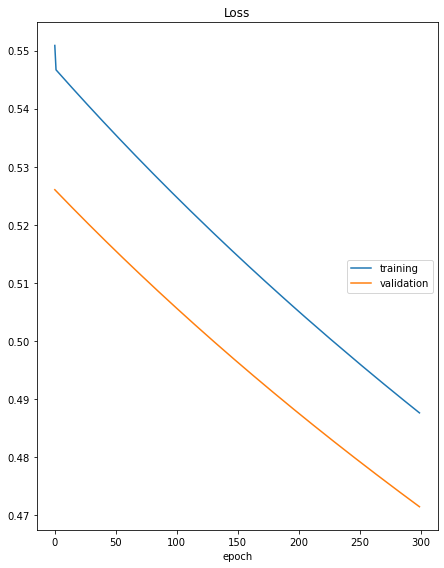

Loss
	training         	 (min:    0.488, max:    0.551, cur:    0.488)
	validation       	 (min:    0.472, max:    0.526, cur:    0.472)
11/11 [==============================] - 0s 28ms/step - loss: 0.4877 - val_loss: 0.4715
MAE: 0.6763927694186568
MSE: 0.47150170227713983


In [15]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='ftrl', loss='mean_squared_error')

fBestModel = './1_model_1_ftrl.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

# 1. Análisis

Para este ejercicio se determinó como función de pérdida la métrica MAE Mean (Squared Error), con el objetivo de usar una métrica estándar para los modelos regresión. Se plantearon una serie de experimentos para entender cuál sería el mejor optimizador para este problema, para lo cual se entrenaron diferentes modelos con las mismas características pero diferente optimizador con epochs de 300, los optimizadores que se probaron fueron:
-	SGD
-	AdaGrad
-	AdaM
-	AdaDelta
-	AdaGrad
-	AdaMax
-	NAdam
-	FTRL

Para evaluar los modelos se tuvo en cuenta la métrica MAE (Mean Absolute Error), ya que permite tener una métrica de evaluación interpretable y fácil de entender. Teniendo en cuenta lo anterior entonces se encuentra que hay optimizadores que no son útiles para este problema  ya se demoran mucho en mejorar, los optimizadores que se pueden entrar a evaluar por el MAE son el Adam, Adamax, Aadam. Para este caso estos modelos tienen un desempeño similar pero para efectos prácticos se va elegir el **NAdam** como el mejor optimizador de modelo que presenta menor MAE y se trabajará en posteriores ejercicios con este optimizador. 


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

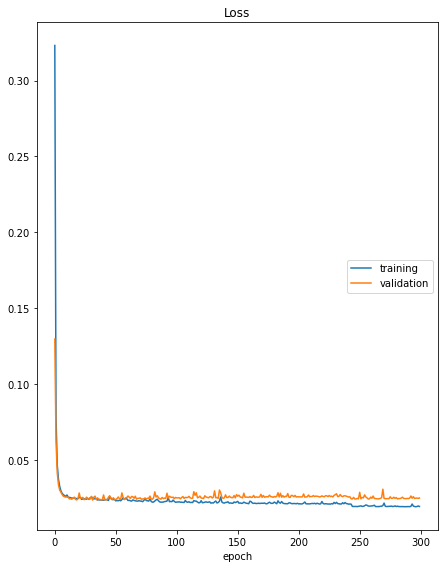

Loss
	training         	 (min:    0.019, max:    0.323, cur:    0.019)
	validation       	 (min:    0.023, max:    0.130, cur:    0.025)
11/11 [==============================] - 0s 24ms/step - loss: 0.0192 - val_loss: 0.0248
MAE: 0.06184426466623942
MSE: 0.006984039503054887


In [16]:
# Celda 2

from keras.layers import Activation

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='nadam', loss='mean_squared_error')

fBestModel = './2_model_1_256.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

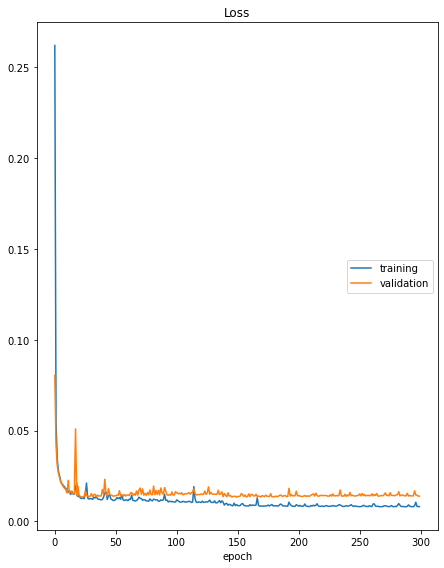

Loss
	training         	 (min:    0.008, max:    0.262, cur:    0.008)
	validation       	 (min:    0.013, max:    0.080, cur:    0.014)
11/11 [==============================] - 0s 40ms/step - loss: 0.0081 - val_loss: 0.0139
MAE: 0.058636770248413086
MSE: 0.006278965107447109


In [17]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256*2,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='nadam', loss='mean_squared_error')

fBestModel = './2_model_1_256_512.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

print('MAE:', mean_absolute_error(Y_test, model.predict(X_test).T[0]))

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

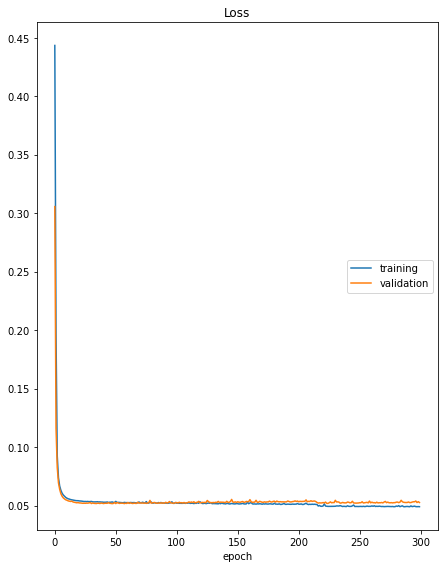

Loss
	training         	 (min:    0.049, max:    0.443, cur:    0.049)
	validation       	 (min:    0.052, max:    0.306, cur:    0.053)
11/11 [==============================] - 0s 38ms/step - loss: 0.0490 - val_loss: 0.0526
MAE: 0.05923701906204225
MSE: 0.0065029193290872395


In [18]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='nadam', loss='mean_squared_error')

fBestModel = './2_model_1_256_64.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras()])

MAE_2 = mean_absolute_error(Y_test, model.predict(X_test).T[0])

print('MAE:', MAE_2)

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

#2. Análisis 

Con el ejerció anterior se definió el optimizador para el modelo, ahora el reto es plantear una arquitectura de red neuronal para el modelo. De forma exploratoria la segunda capa se prueba con un tamaño igual el doble y de la mirad que la primera capa.

Con esto encontramos que los modelos con mayor tamaño convergen con una mayor velocidad pero se empieza a notar un poco de inestabilidad y overfitting en los epochs finales. 

La arquitectura que presenta menos  inestabilidad y overfitting fue la construida la primera capa de 256 y la segunda de tamaño 56, además tiene la ventaja que es la presta menor MAE.


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

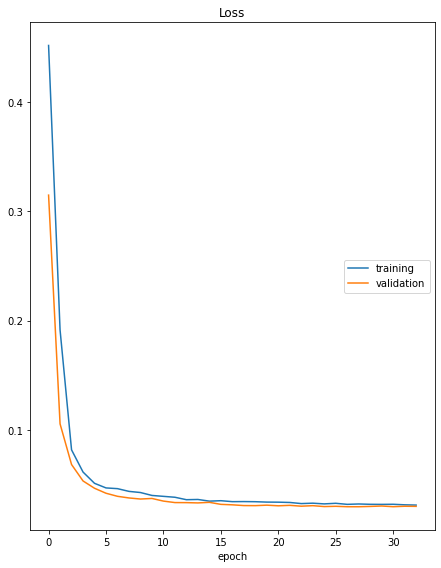

Loss
	training         	 (min:    0.031, max:    0.452, cur:    0.031)
	validation       	 (min:    0.030, max:    0.315, cur:    0.030)
11/11 [==============================] - 0s 21ms/step - loss: 0.0311 - val_loss: 0.0299
Epoch 00033: early stopping
MAE: 0.05275660825570425
MSE: 0.004435636558891492


In [19]:
# Celda 3
from keras.callbacks import EarlyStopping

K.clear_session()

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1) 

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dropout(0.1, input_shape=(dims,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='nadam', loss='mean_squared_error')

fBestModel = './3_model.h5'

best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=300, 
          validation_data=(X_test, Y_test),
          callbacks=[best_model, PlotLossesKeras(), early_stop])

MAE_3 = mean_absolute_error(Y_test, model.predict(X_test).T[0])

print('MAE:', MAE_3)

print('MSE:', mean_squared_error(Y_test, model.predict(X_test).T[0]))

# 3. Análisis 
Para este ejercicio se agregó una cada de Dropout al inicio de la arquitectura de red y se usó el método de EarlyStopping, con el objetivo de detener el entrenamiento cuando la red converja en la mejor métrica de evaluación y no se note una mejora en el entrenamiento.
Se encontró que el tiempo de entrenamiento se disminuye bastante y es sumamente práctico. Por otro lado como se mantuvo la arquitectura del ejercicio anterior, notamos que la cada adicional de Dropout, vuelve un poco instable modelo pero mejor su métrica MAE respecto del anterior. 


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

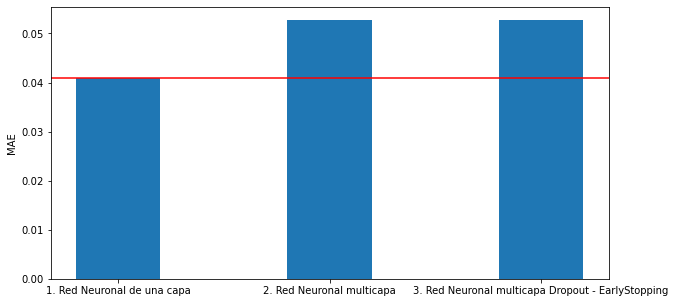

In [22]:
# Celda 4


import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))

MAE = [MAE_1, MAE_3, MAE_3]

names = ['1. Red Neuronal de una capa', '2. Red Neuronal multicapa', '3. Red Neuronal multicapa Dropout - EarlyStopping']

plt.axhline(y = min(MAE), color = 'r', linestyle = '-')
 
# creating the bar plot
plt.bar(names, MAE, width = 0.4)
 
#plt.xlabel("Courses offered")
plt.ylabel("MAE")
#plt.title("Students enrolled in different courses")
plt.show()

# 4. Análisis 

Cómo se puede observar para cada ejercicio se encontró el mejor modelo con las especificaciones requeridas, cada una con ventajas y desventajas que se van a discutir a continuación:
1.	Red Neuronal de una capa
Para este modelo encontramos que el mejor optimizador era el ** Adamax**, presenta la ventaja que es el modelo con mejor desempeño de todos, con el MAE más bajo. La desventaja es su demora de entrenamiento ya que al no saber en número necesario de epochs para la convergencia del modelo es necesario elegir un número grande.
 
2.	Red Neuronal multicapa 
Para este modelo presenta la ventaja que tiene una mayor velocidad de convergencia, pero como desventaja presenta que al no controlar los epochs al final se empieza a observar overfitting. Otra desventaja es determinar la arquitectura de la red neuronal, ya que posiblemente se puede encontrar una arquitectura con mejor desempeño pero puede ser demorado encontrar esa arquitectura.

3.	Red Neuronal multicapa Dropout – EarlyStopping
Este modelo presenta la ventaja que su tiempo de entrenamiento se reduce bastante ya que permite controlar las epochs. Como desventaja presenta que también es difícil definir la mejor arquitectura, adicionalmente no tuvo el mejor desempeño con la métrica MAE pero con una pequeña con el mejor modelo.
